<a href="https://colab.research.google.com/github/kasozivincent/Generative_Adversarial_Networks/blob/main/Learning_2D_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Imports

In [ ]:
import numpy as np
from keras.models import Model, Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
from matplotlib import pyplot as plt

## Class to generate model data

In [ ]:
class ModelData():
    def __init__(self, latent_dim, number_of_samples):
        self.latent_dim = latent_dim
        self.number_of_samples = number_of_samples
        
    def generate_latent_points(self):
        return np.random.randn(self.number_of_samples, self.latent_dim)
    
    def create_real_data(self):
        xs = np.random.rand(self.number_of_samples, 1) - 0.5
        ys = xs * xs 
        return np.asarray(np.hstack((xs, ys)))
    
    def generate_real_data(self):
        dataset = self.create_real_data()
        idx = np.random.randint(0, len(dataset), self.number_of_samples)
        Xs = dataset[idx]
        Ys = np.ones((self.number_of_samples, 1))
        return Xs, Ys

    def generator_outputs(self, generator):
        x_input = self.generate_latent_points()
        X = generator.predict(x_input)
        y = np.zeros((self.number_of_samples, 1))
        return X, y

## Generator class

In [ ]:
class Generator():
    def __init__(self, latent_dim, output_units):
        self.latent_dim = latent_dim
        self.output_units = output_units
        
    def generator(self):
        input_layer = Input(shape=(self.latent_dim,))
        gen1 = Dense(units=15, activation='relu', kernel_initializer='he_uniform', name='gen_layer_1')(input_layer)
        output_layer = Dense(units=self.output_units, activation='linear', name='gen_layer_2')(gen1)
        model = Model(inputs=[input_layer], outputs=[output_layer], name='generator')
        return model


## Discriminator class

In [ ]:
class Discriminator():
    def __init__(self, inputs):
        self.inputs = inputs
        
    def discriminator(self):
        input_layer = Input(shape=(self.inputs,))
        dis1 = Dense(units=25, activation='relu',kernel_initializer='he_uniform', name='dis_layer_1')(input_layer)
        dis2 = Dense(units=10, activation='relu',kernel_initializer='he_uniform', name='dis_layer_2')(dis1)
        output_layer = Dense(units=1, activation='sigmoid', name='dis_output')(dis2)
        model = Model(inputs=[input_layer], outputs=[output_layer], name='discriminator')
        model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer= 'adam')
        return model
        

## GAN class

In [ ]:
class GanModel():
    def __init__(self, generator, discriminator):
        self.generator = generator
        self.discriminator = discriminator
        
    def ganModel(self):
        self.discriminator.trainable = False
        model = Sequential()
        model.add(self.generator)
        model.add(self.discriminator)
        model.compile(loss='binary_crossentropy', optimizer= 'adam')
        return model
        

## Class defining the Trainer object

In [ ]:
class Trainer():
    def __init__(self, epochs, generator, discriminator, gan_model,batch, e_val):
        self.epochs = epochs
        self.generator = generator
        self.discriminator = discriminator
        self.gan_model = gan_model
        self.model_data = ModelData(5, batch)
        self.e_val = e_val
        self.batch = batch
        
    def train(self):
        for epoch in range(self.epochs):
            x_real, y_real = self.model_data.generate_real_data()
            x_fake, y_fake = self.model_data.generator_outputs(self.generator)
            d_loss1, _ = self.discriminator.train_on_batch(x_real, y_real)
            d_loss2, _ = self.discriminator.train_on_batch(x_fake, y_fake)
            x_gan = self.model_data.generate_latent_points()
            y_gan = np.ones((self.batch, 1))
            self.gan_model.train_on_batch(x_gan, y_gan)
            if (epoch + 1) % self.e_val == 0 :
              print(f'{epoch + 1} Real loss : {d_loss1}, Fake loss : {d_loss2}')
              self.summarize_training(epoch + 1)
                
    def summarize_training(self, epoch):
        x_real, y_real = self.model_data.generate_real_data()
        _, acc_real = self.discriminator.evaluate(x_real, y_real, verbose=0)
        x_fake, y_fake = self.model_data.generator_outputs(self.generator)
        _, acc_fake = self.discriminator.evaluate(x_fake, y_fake, verbose=0)
        print(f'Epoch : {epoch}, Acc_real : {acc_real}, Acc_fake : {acc_fake}')
        plt.scatter(x_real[:, 0], x_real[:, 1], color='red')
        plt.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
        plt.xlim([-0.5, 0.5])
        plt.ylim([0, 0.25])
        plt.show()

## Composition root

1000 Real loss : 0.6596059203147888, Fake loss : 0.6552751660346985
Epoch : 1000, Acc_real : 0.78125, Acc_fake : 0.5390625


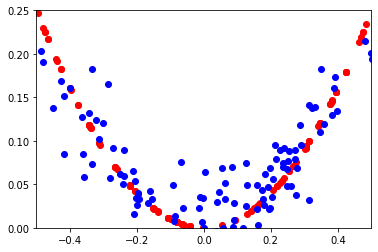

2000 Real loss : 0.6842734813690186, Fake loss : 0.6774536371231079
Epoch : 2000, Acc_real : 0.578125, Acc_fake : 0.4921875


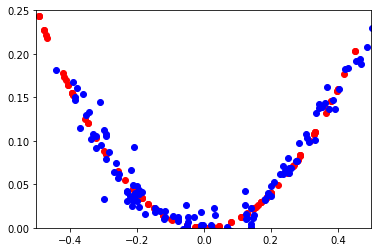

3000 Real loss : 0.6771854162216187, Fake loss : 0.6705896258354187
Epoch : 3000, Acc_real : 0.5625, Acc_fake : 0.6484375


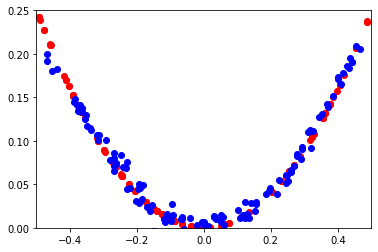

4000 Real loss : 0.6839279532432556, Fake loss : 0.6775690317153931
Epoch : 4000, Acc_real : 0.6640625, Acc_fake : 0.578125


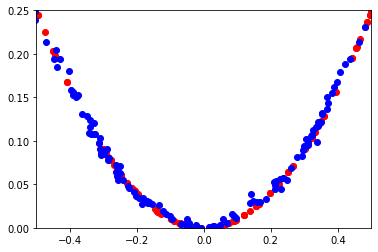

5000 Real loss : 0.6647763848304749, Fake loss : 0.6823036670684814
Epoch : 5000, Acc_real : 0.6640625, Acc_fake : 0.5625


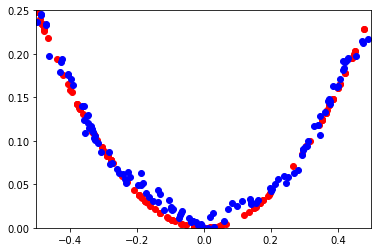

6000 Real loss : 0.6774678230285645, Fake loss : 0.6730697154998779
Epoch : 6000, Acc_real : 0.625, Acc_fake : 0.5546875


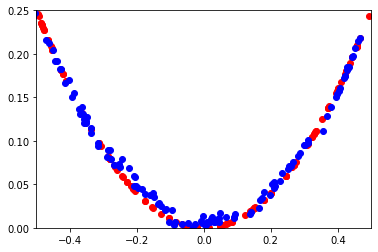

7000 Real loss : 0.6595977544784546, Fake loss : 0.668708086013794
Epoch : 7000, Acc_real : 0.609375, Acc_fake : 0.578125


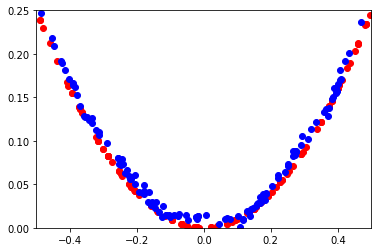

8000 Real loss : 0.6546817421913147, Fake loss : 0.6550250053405762
Epoch : 8000, Acc_real : 0.703125, Acc_fake : 0.625


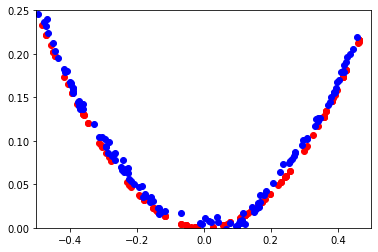

In [ ]:
D = Discriminator(2)
D = D.discriminator()

G = Generator(5, 2)
G = G.generator()

Gan = GanModel(G, D)
Gan = Gan.ganModel()

trainer = Trainer(10000, G, D, Gan, 128, 1000)
trainer.train()